# 0. Running STARLIGHT

Start running the STARLIGHT grid for the galaxies you have received via USB. Start now, since this will take a while.

# 1. Plotting your STARLIGHT results

In [1]:
'''
Importing libraries.
'''
import atpy
import pystarlight.io.starlighttable #io.starlighttable #@UnusedImport
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [72]:
def plot_spectra(ts, axes=None, return_axes=False):
    '''
    Plot the observed, synthetic and residual spectra for the STARLIGHT fitting.
    '''
    
    # ++ limits
    # ++ pdf
    
    plotpars = {'legend.fontsize': 12,
                'xtick.labelsize': 14,
                'ytick.labelsize': 14,
                'font.size': 14,
                'axes.titlesize': 14,
                'lines.linewidth': 1.,
                'font.family': 'Times New Roman',
                'image.cmap': 'GnBu',
                }
    plt.rcParams.update(plotpars)
    
    ll = ts.spectra.l_obs

    f_obs = ts.spectra.f_obs
    f_syn = ts.spectra.f_syn
    f_wei = ts.spectra.f_wei
    f_err = f_wei**-1
    f_res = (f_obs - f_syn) / f_obs
    
    ageBase = np.unique(ts.population.popage_base)
    ZBase = np.unique(ts.population.popZ_base)

    vmax = f_syn.max() * 1.1
    err_lim = 10.0
    
    if axes is None:
        fig = plt.figure(figsize=(10, 8))
        ax1 = plt.subplot(311)
        ax2 = plt.subplot(312, sharex=ax1)
        ax3 = plt.subplot(313)
        axes=(ax1, ax2, ax3)
        axes_passed =False
    else:
        fig = plt.gcf()
        axes_passed = True
    #ax1 = plt.subplot(311)
    err = f_err
    f = f_obs
    err_scale = int(0.2 * f.mean() / err.mean())
    s = f_syn
    axes[0].plot(ll, f, 'k-', label='observed')
    axes[0].plot(ll, s, 'r-', label='synthetic')
    axes[0].set_ylabel(r'$F_\lambda$ (normalized @ $5635\,\AA$)')
    axes[0].set_xlabel(r'wavelength [$\AA$]')
    axes[0].set_xlim(ll.min(), ll.max())
    axes[0].set_ylim(0, 3.0*np.median(f))
    axes[0].legend(loc='upper right', frameon=False)
    
    #plt.subplot(312, sharex=ax1)
    r = f_res
    w = f_wei
    err = f_err
    if axes_passed:
        linestyles='--'
    else:
        linestyles = '-'
    axes[1].plot(ll, r, 'k-')
    axes[1].plot(ll, np.zeros_like(ll), 'k:')
    
    fitted = np.ma.masked_where(w < 0, r)
    axes[1].plot(ll, fitted, 'b-')
    
    masked = np.ma.masked_where(w != 0, r)
    axes[1].plot(ll, masked, '-', color='magenta', linestyle=linestyles)
    
    clipped = np.ma.masked_where(w != -1, r)
    axes[1].plot(ll, clipped, 'x', color='red')
    
    flagged = np.ma.masked_where(w != -2, r)
    axes[1].plot(ll, flagged, '-', color='green')
    
    axes[1].set_ylabel(r'residual flux [%]')
    axes[1].set_xlabel(r'wavelength [$\AA$]')
    axes[1].set_ylim(-1, 1)
    axes[1].set_xlim(ll.min(), ll.max())
    if not axes_passed:
        axes[1].legend(loc='upper left', frameon=False)
    
    #plt.subplot(313)
    popmu_cor = ts.population.popmu_cor.reshape([len(ZBase), len(ageBase)])
    popmu_cor[popmu_cor < 0.5] = np.nan
    if not axes_passed:
        marker = 'o'
    else:
        marker = 'd'
    for iz in range(len(ZBase)):
        axes[2].scatter(np.log10(ageBase),popmu_cor[iz,:], c=np.ones_like(ageBase)*iz, 
                        marker=marker, edgecolor="None", vmin=0, vmax=len(ZBase), 
                        cmap='plasma', s=50) 
    
    """
    axes[2].imshow(popmu_cor, interpolation='None')
    axes[2].set_xlabel('Age base')
    axes[2].set_ylabel('Metallicity base')
    axes[2].set_title('popmu_cor')
    """
    
    fig.tight_layout()
    if return_axes:
        return axes

/Users/christophemorisset/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in reciprocal
/Users/christophemorisset/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide


<IPython.core.display.Javascript object>


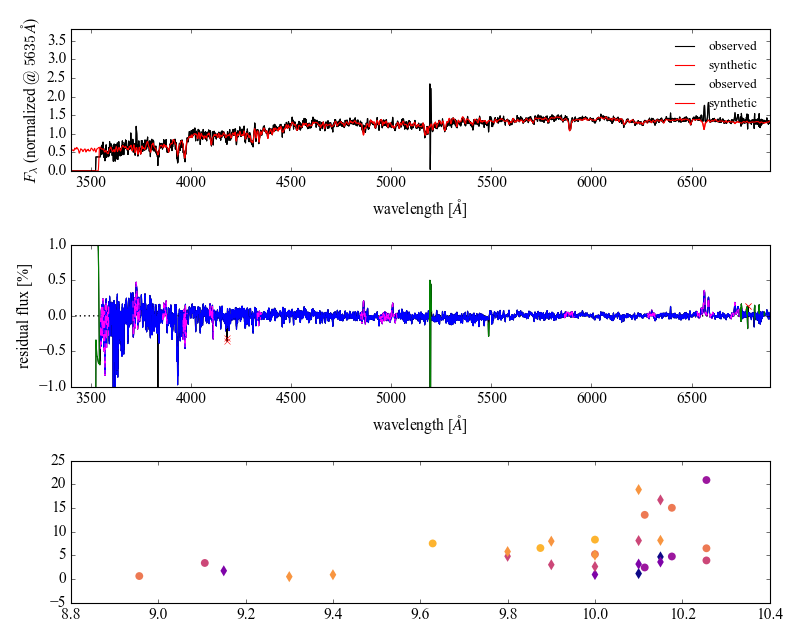

/Users/christophemorisset/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [73]:
'''
Plotting the STARLIGHT result.
'''
%matplotlib notebook
ts = atpy.TableSet('../STARLIGHTv04/0404.51812.036.sc4.NA3.gm.CCM.BS', type = 'starlightv4')
ts2 = atpy.TableSet('../STARLIGHTv04/0404.51812.036.sc4.NA3.gm.CCM.gsd01', type = 'starlightv4')
axes = plot_spectra(ts, return_axes=True)
plot_spectra(ts2, axes=axes)

## Has the above worked?

No? Get help!

Yes? Great! Now try this:

- Change the x axis limits to zoom in the H$\beta$ line in the residual spectrum.

# 2. Plotting your new STARLIGHT runs

Use the example above to plot your new STARLIGHT runs. Compare the runs from BC03 and Granada+MILES for the same galaxy.

## Has the above worked?

No? Get help!

Yes? Great! Now try these advanced STARLIGHT exercises:

- Create a new grid file with a new seed (`[your phone number]`). Remember to save the STARLIGHT fits files with new names. Compare fits for the same galaxy and the same base but different seeds.

- Fit only part of your spectra. Tell STARLIGHT to use only the blue part, or only the red part. Compare with the full fits.

Super advanced:

- Choose a few Lick indices (Worthey et al. 1994). Tell STARLIGHT to fit only those indices. You will probably need to edit the masks files.

- Think about how you could retrieve information about uncertainties in the STARLIGHT output parameters. Implement a quick version.

- Tell us about how you would estimate the uncertainty in emission line measurements due to the stellar continuum subtraction.

# 3. Everyone reconvenes and discusses